# PART 3: LSTM

**_TABLE OF CONTENT_**
     0. General Functions
     1. AAPL
        1.1 Train and test set size
        1.2 LSTM
     2. AMZN
     3. GOOG
     4. FB
     5. NFLX

In [7]:
import pandas as pd
import numpy as np
from IPython.core.display import display
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from preprocessing import create_basetable
from datetime import date
from sklearn import metrics
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from helpFunctions import *

## 0. General functions

In [8]:
start_independent = date(2020, 3, 22)
end_independent= date(2020, 10, 30)
start_dependent = date(2020,11,1)

In [9]:
lstm_auc = {}
def lstmClassifier(x_train, x_test, y_train, y_test, tck):

    # Shape testing data
    df_for_testing_scaled = pd.merge(pd.DataFrame(y_test).reset_index(drop=True),
                                 pd.DataFrame(x_test).reset_index(drop=True),
                                 how='inner',
                                 left_index=True,
                                 right_index=True)
    df_for_testing_scaled = np.array(df_for_testing_scaled)
    testX = []
    testY = []
    n_future = 1   # Number of days we want to predict into the future
    n_past = 14     # Number of past days we want to use to predict the future
    for i in range(n_past, len(df_for_testing_scaled) - n_future +1):
        testX.append(df_for_testing_scaled[i - n_past:i, 0:df_for_testing_scaled.shape[1]])
        testY.append(df_for_testing_scaled[i + n_future - 1:i + n_future, 0])
    testX, testY = np.array(testX), np.array(testY)


    # Shape training data
    df_for_training_scaled = pd.merge(pd.DataFrame(y_train).reset_index(drop=True),
                                     pd.DataFrame(x_train).reset_index(drop=True),
                                     how='inner',
                                     left_index=True,
                                     right_index=True)
    df_for_training_scaled = np.array(df_for_training_scaled)
    trainX = []
    trainY = []
    for i in range(n_past, len(df_for_training_scaled) - n_future +1):
        trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training_scaled.shape[1]])
        trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainX, trainY = np.array(trainX), np.array(trainY)


    # define Autoencoder model
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # fit model
    history = model.fit(trainX, trainY, epochs=1000, batch_size=32, validation_split=0.1, verbose =0)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

    #  Test model
    pred = model.predict_classes(testX)
    _, train_acc = model.evaluate(trainX, trainY, verbose=0)
    _, test_acc = model.evaluate(testX, testY, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    evaluate_model(pred, testY)



## 1. AAPL

In [10]:
%%time
tck = 'AAPL'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 38.3 s


Inspect the size of the training and test set

In [11]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  132
Number of sell observations :  55
Number of buy observations :  77

--------Test set--------
Total number of observations:  91
Number of sell observations :  47
Number of buy observations :  44


 LSTM model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 14, 64)            36352     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 48,801
Trainable params: 48,801
Non-trainable params: 0
_________________________________________________________________
Train: 0.941, Test: 0.494


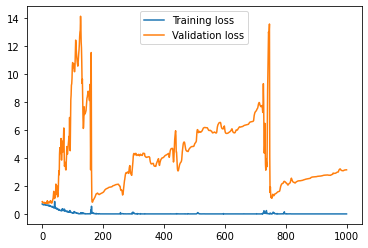

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


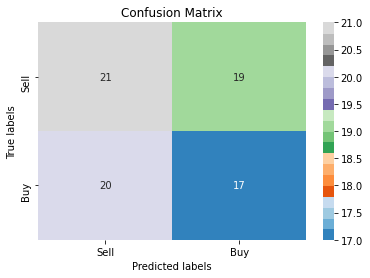

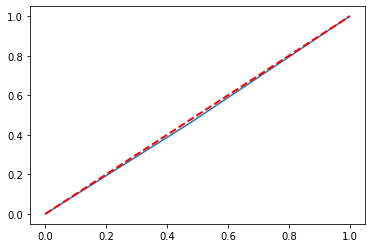

In [12]:
lstmClassifier(x_train,x_test, y_train, y_test)

## 2. AMZN

In [13]:
%%time
tck = 'AMZN'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 42.8 s


Inspect the size of the training and test set

In [14]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  132
Number of sell observations :  52
Number of buy observations :  80

--------Test set--------
Total number of observations:  91
Number of sell observations :  45
Number of buy observations :  46


LSTM model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 14, 64)            36352     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 48,801
Trainable params: 48,801
Non-trainable params: 0
_________________________________________________________________
Train: 0.932, Test: 0.532


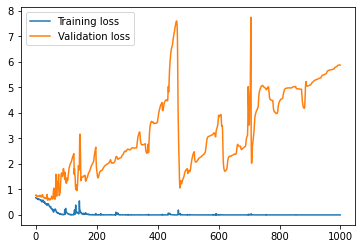

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


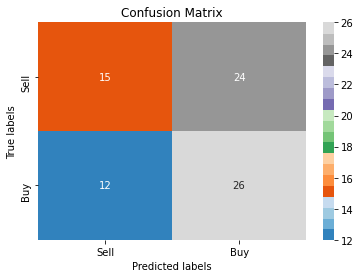

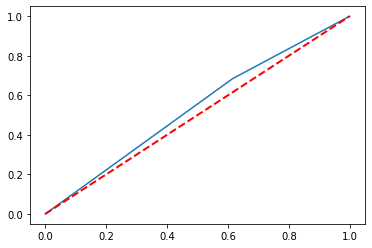

In [15]:
lstmClassifier(x_train,x_test, y_train, y_test)

## 3. FB

In [16]:
%%time
tck = 'FB'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 35.6 s


Inspect the size of the training and test set

In [17]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  132
Number of sell observations :  52
Number of buy observations :  80

--------Test set--------
Total number of observations:  91
Number of sell observations :  46
Number of buy observations :  45


LSTM model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 14, 64)            36352     
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 48,801
Trainable params: 48,801
Non-trainable params: 0
_________________________________________________________________
Train: 0.932, Test: 0.519


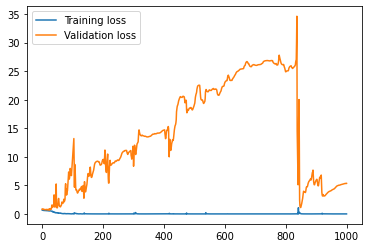

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


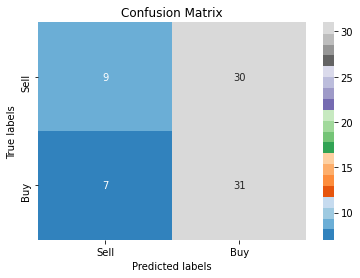

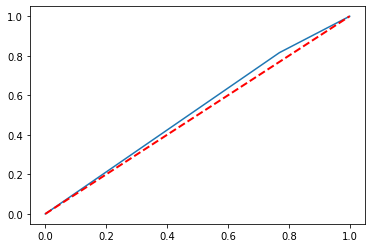

In [18]:
lstmClassifier(x_train,x_test, y_train, y_test)

## 4. GOOG

In [19]:
%%time
tck = 'GOOG'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 34.5 s


Inspect the size of the training and test set

In [20]:
# Check the number of observations in the test and training set
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  132
Number of sell observations :  50
Number of buy observations :  82

--------Test set--------
Total number of observations:  91
Number of sell observations :  40
Number of buy observations :  51


LSTM model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 14, 64)            36352     
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 48,801
Trainable params: 48,801
Non-trainable params: 0
_________________________________________________________________
Train: 0.924, Test: 0.519


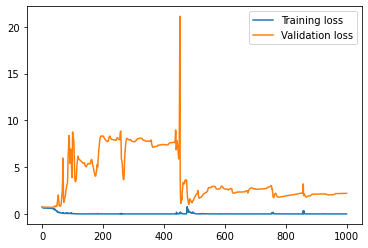

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


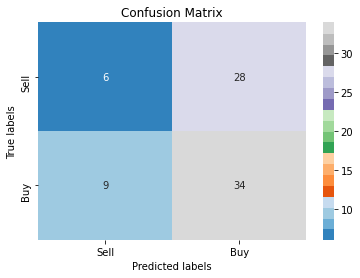

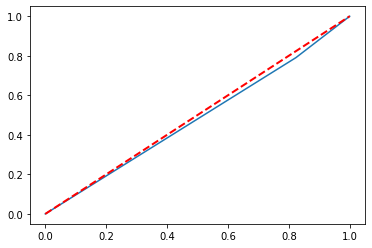

In [21]:
lstmClassifier(x_train,x_test, y_train, y_test)

## 5. NFLX

In [22]:
%%time
tck = 'NFLX'
# Retrieved scaled train and test set for specified stock symbol
x_train, x_test, y_train, y_test = create_basetable(tck,
                                                  start_independent= start_independent,
                                                  end_independent= end_independent,
                                                  start_dependent= start_dependent)

Wall time: 37.2 s


Inspect the size of the training and test set

In [23]:
buy_sell_observations(y_train, y_test)

--------Training set--------
Total number of observations:  131
Number of sell observations :  63
Number of buy observations :  68

--------Test set--------
Total number of observations:  91
Number of sell observations :  44
Number of buy observations :  47


LSTM model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 14, 64)            36352     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 48,801
Trainable params: 48,801
Non-trainable params: 0
_________________________________________________________________
Train: 0.966, Test: 0.545


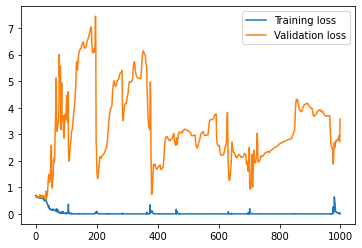

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


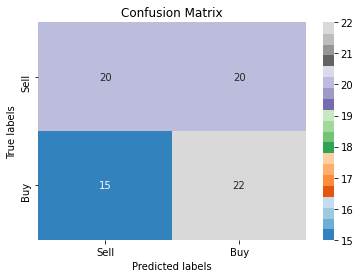

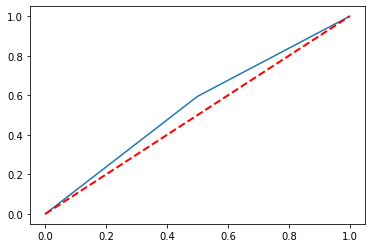

In [24]:
lstmClassifier(x_train,x_test, y_train, y_test)
